In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE=265
CHANNEL=3
train_datagan=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10)

train_generator=train_datagan.flow_from_directory(
    'Dataset/split_dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse')

Found 1506 images belonging to 3 classes.


In [3]:
for image_batch,label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.52782434 0.46507925 0.47684395]
  [0.53167623 0.4689312  0.4806959 ]
  [0.54870427 0.48595923 0.49772394]
  ...
  [0.66175646 0.6146976  0.6225407 ]
  [0.67023516 0.62317634 0.6310195 ]
  [0.678714   0.63165516 0.6394983 ]]

 [[0.5283896  0.46564448 0.47740918]
  [0.52941525 0.46667016 0.47843486]
  [0.54587805 0.48313296 0.49489766]
  ...
  [0.71206146 0.66500264 0.6728458 ]
  [0.7098005  0.66274166 0.6705848 ]
  [0.7075395  0.6604807  0.6683238 ]]

 [[0.5289548  0.46620974 0.47797444]
  [0.52715427 0.46440917 0.47617388]
  [0.5430518  0.4803067  0.49207142]
  ...
  [0.7014148  0.654356   0.66219914]
  [0.706502   0.6594432  0.66728634]
  [0.7115893  0.66453046 0.6723736 ]]

 ...

 [[0.5094886  0.44282195 0.4663514 ]
  [0.50666237 0.4399957  0.46352512]
  [0.5038361  0.43716946 0.46069887]
  ...
  [0.5686275  0.5176471  0.5529412 ]
  [0.57563865 0.52465826 0.5599524 ]
  [0.55568296 0.50470257 0.5399967 ]]

 [[0.5233363  0.45666966 0.48019907]
  [0.52842355 0.46175689 0.4852863 ]


In [4]:
validation_datagan=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10)

validation_generator=train_datagan.flow_from_directory(
    'Dataset/split_dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse')

Found 215 images belonging to 3 classes.


In [5]:
test_datagan=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10)

test_generator=train_datagan.flow_from_directory(
    'Dataset/split_dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse')

Found 431 images belonging to 3 classes.


In [6]:
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
n_classes=3 
model=models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,'relu'),
    layers.Dense(n_classes,'softmax')
   
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 263, 263, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 131, 131, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 129, 129, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) 

In [10]:
1506/32

47.0625

In [11]:
215/32

6.71875

In [12]:
earlystopping=EarlyStopping(monitor='val_accuracy',verbose=1,mode='auto',patience=3)

In [13]:
history=model.fit(train_generator,steps_per_epoch=47,
         batch_size=32,
         validation_data=validation_generator,
         validation_steps=6,
         verbose=1,epochs=20)

Epoch 1/20
47/47 [==============================] - 46s 961ms/step - loss: 0.9416 - accuracy: 0.4640 - val_loss: 0.8787 - val_accuracy: 0.4740
Epoch 2/20
47/47 [==============================] - 47s 1s/step - loss: 0.9124 - accuracy: 0.4620 - val_loss: 0.7833 - val_accuracy: 0.5052
Epoch 3/20
47/47 [==============================] - 47s 984ms/step - loss: 0.7051 - accuracy: 0.6649 - val_loss: 0.5857 - val_accuracy: 0.7292
Epoch 4/20
47/47 [==============================] - 46s 979ms/step - loss: 0.4966 - accuracy: 0.7870 - val_loss: 0.4491 - val_accuracy: 0.8385
Epoch 5/20
47/47 [==============================] - 50s 1s/step - loss: 0.4514 - accuracy: 0.8155 - val_loss: 0.5199 - val_accuracy: 0.7552
Epoch 6/20
47/47 [==============================] - 48s 1s/step - loss: 0.3284 - accuracy: 0.8636 - val_loss: 0.2313 - val_accuracy: 0.9062
Epoch 7/20
47/47 [==============================] - 47s 990ms/step - loss: 0.2664 - accuracy: 0.8955 - val_loss: 0.4808 - val_accuracy: 0.7917
Epoch 8/

In [14]:
model.evaluate(test_generator)

14/14 [==============================] - 6s 387ms/step - loss: 0.0872 - accuracy: 0.9722


[0.08721017837524414, 0.9721577763557434]

In [15]:
EPOCHS=history.epoch[-1]+1
EPOCHS

20

In [16]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

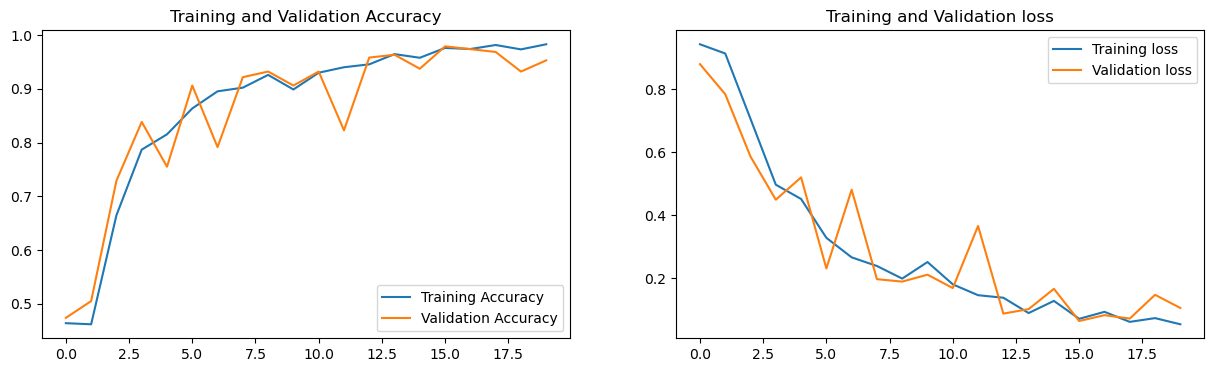

In [17]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc=4)
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc=1)
plt.title('Training and Validation loss')

In [18]:
class_name=test_generator.class_indices.keys()
class_name=list(class_name)
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

first image to predict
first image actual label: Potato___Late_blight
1/1 [==============================] - 0s 346ms/step
Potato___Late_blight


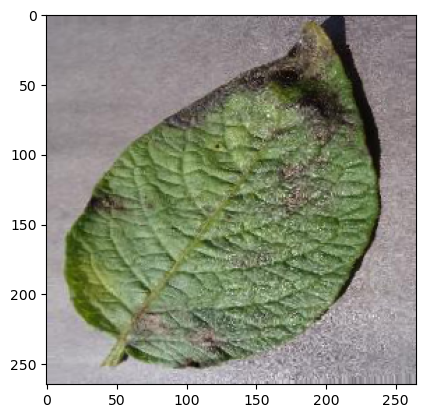

In [19]:
import numpy as np

for image_batch,label_batch in test_generator:
    print('first image to predict')
    plt.imshow(image_batch[0])
    print('first image actual label:',class_name[label_batch[0].astype(int)])
    
    batch_prediction=model.predict(image_batch)
    print(class_name[np.argmax(batch_prediction[0])])
    break

In [34]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i])
    img_array=tf.expand_dims(img_array,0) # create a batch
    prediction=model.predict(img_array)
    predicted_class=class_name[np.argmax(prediction[0])]
    confidence=round(100*(np.max(prediction[0])))
    return predicted_class,confidence

1/1 [==============================] - 0s 18ms/step


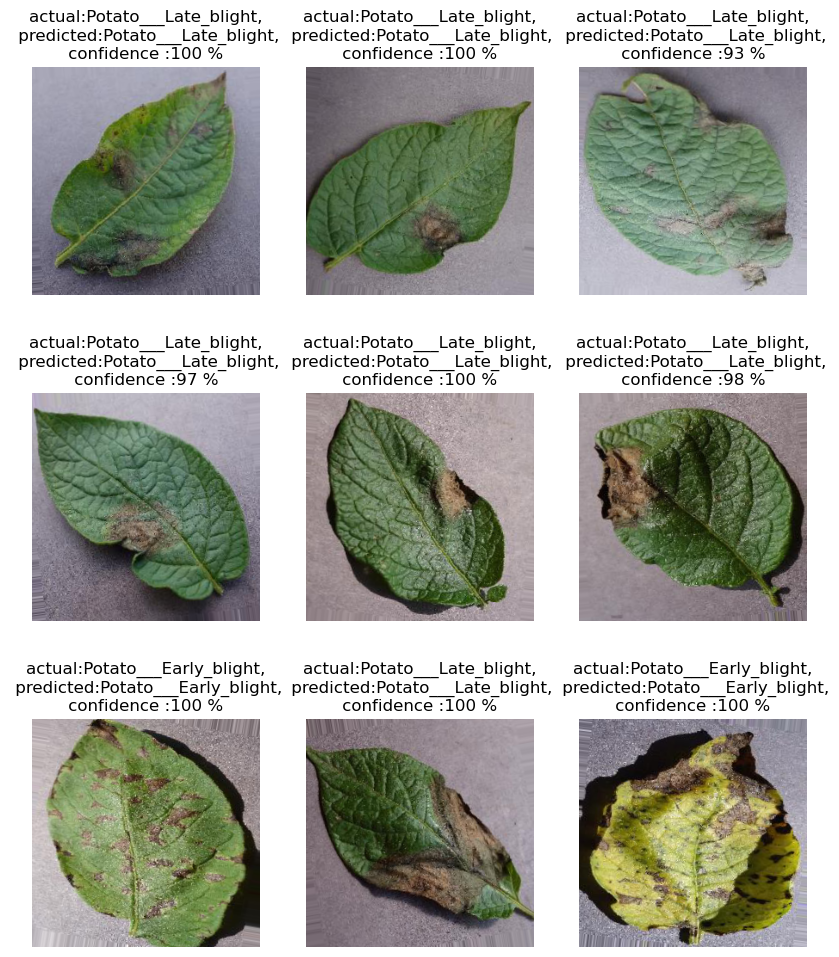

In [36]:
plt.figure(figsize=(10,12))
for images,labels in test_generator:
    for i in range (9):
        ax=plt.subplot(3,3,i+1)

        plt.imshow(images[i])

        actual_class=class_name[int(labels[i])]
        predicted_class,confidence=predict(model,images[i])
        plt.title(f'actual:{actual_class},\n predicted:{predicted_class},\n confidence :{confidence} % ')
        plt.axis('off')
    break

In [37]:
model.save("../Potato-desease/final.h5")